In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
import warnings

In [3]:
%matplotlib inline

In [4]:
warnings.filterwarnings("ignore")

In [5]:
train=pd.read_csv("C:/Datasets/Train_ts.csv")
test=pd.read_csv("C:/Datasets/Test_ts.csv")

In [6]:
train_original=train.copy()
test_original=test.copy()

In [7]:
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [8]:
test.columns

Index(['ID', 'Datetime'], dtype='object')

In [9]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [10]:
train['Datetime'].head()
# this is object type and needs to be converted to datetime

0    25-08-2012 00:00
1    25-08-2012 01:00
2    25-08-2012 02:00
3    25-08-2012 03:00
4    25-08-2012 04:00
Name: Datetime, dtype: object

In [11]:
train.shape

(18288, 3)

In [12]:
test.shape

(5112, 2)

In [13]:
train['Datetime']=pd.to_datetime(train.Datetime,format="%d-%m-%Y %H:%M")
test['Datetime']=pd.to_datetime(test.Datetime,format="%d-%m-%Y %H:%M")

In [14]:
train.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [15]:
train_original['Datetime']=pd.to_datetime(train_original.Datetime,format="%d-%m-%Y %H:%M")
test_original['Datetime']=pd.to_datetime(test_original.Datetime,format="%d-%m-%Y %H:%M")

In [16]:
for dataframe in (train,test,train_original,test_original):
    dataframe['year']=dataframe.Datetime.dt.year
    dataframe['month']=dataframe.Datetime.dt.month
    dataframe['day']=dataframe.Datetime.dt.day
    dataframe['hour']=dataframe.Datetime.dt.hour

In [17]:
train.columns

Index(['ID', 'Datetime', 'Count', 'year', 'month', 'day', 'hour'], dtype='object')

In [18]:
train.head()

,ID,Datetime,Count,year,month,day,hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [19]:
# adding a column that says which day of week does this date belongs to [0,6] i.e. [Monday(0) to Sunday(6)]
train['day of week']=train['Datetime'].dt.dayofweek 

In [20]:
train['day of week'].value_counts()

6    2616
5    2616
3    2616
2    2616
1    2616
0    2616
4    2592
Name: day of week, dtype: int64

In [21]:
temp=train['Datetime']

In [22]:
def weekend_fn(row):
    if row.dayofweek==5 or row.dayofweek==6:
        return 1
    else:
        return 0

In [23]:
temp2=train['Datetime'].apply(weekend_fn)

In [24]:
temp2.head()

0    1
1    1
2    1
3    1
4    1
Name: Datetime, dtype: int64

In [25]:
train['weekend']=temp2

In [26]:
train.iloc[130:135]

,ID,Datetime,Count,year,month,day,hour,day of week,weekend
130,130,2012-08-30 10:00:00,2,2012,8,30,10,3,0
131,131,2012-08-30 11:00:00,4,2012,8,30,11,3,0
132,132,2012-08-30 12:00:00,2,2012,8,30,12,3,0
133,133,2012-08-30 13:00:00,2,2012,8,30,13,3,0
134,134,2012-08-30 14:00:00,2,2012,8,30,14,3,0


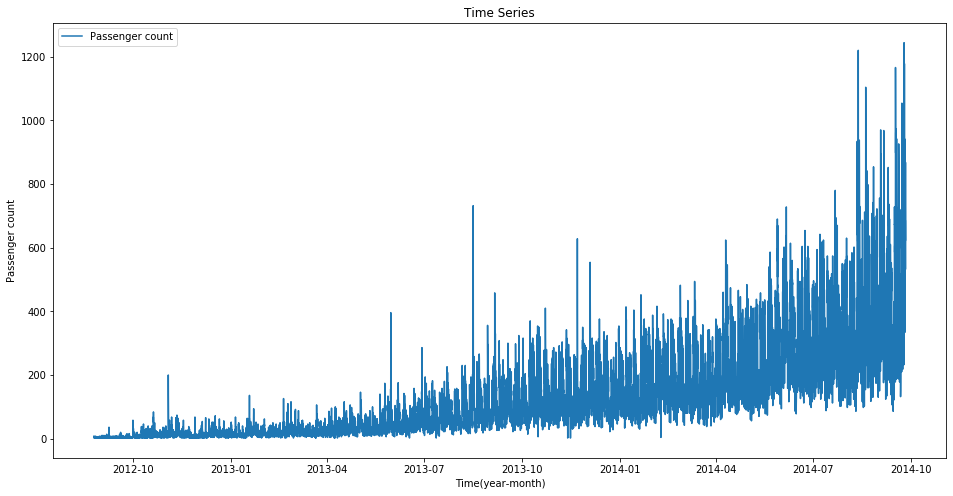

In [27]:
plt.figure(figsize=(16,8)) 
plt.plot(train['Datetime'],train['Count'],label="Passenger count")
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

# EDA

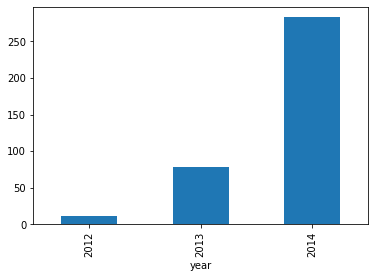

In [28]:
train.groupby('year')['Count'].mean().plot.bar()

# This shows that count increases year by year => one of the hypothesis is correct

In [29]:
train.head()

,ID,Datetime,Count,year,month,day,hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


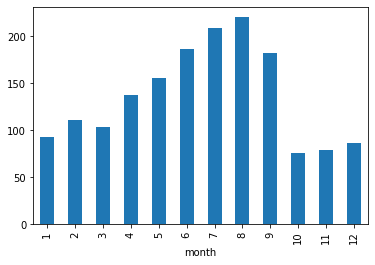

In [30]:
train.groupby('month')['Count'].mean().plot.bar()

# Hypothesis 2 => may to october traffic increases is correct

# But the thing is our trend as we predicted and seen in line graph is that traffic should increase, so this doesn't look right

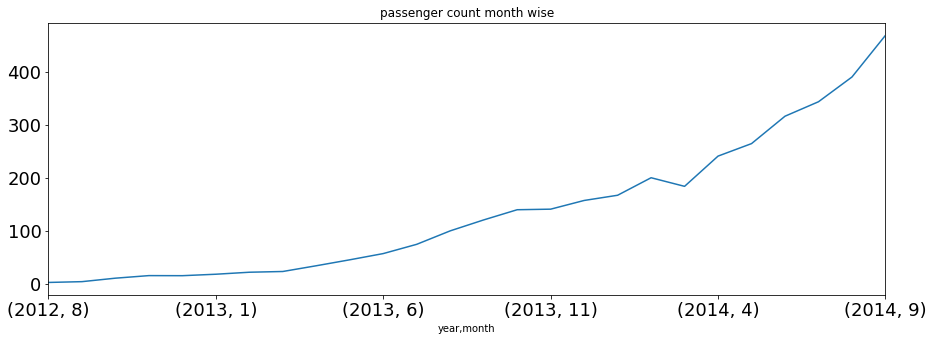

In [31]:
temp=train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize=(15,5),title='passenger count month wise',fontsize=18)

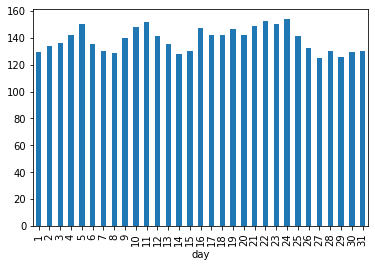

In [32]:
train.groupby('day').Count.mean().plot.bar()

We are not getting much insights from day wise count of the passengers.

We also made a hypothesis that the traffic will be more during peak hours. So let’s see the mean of hourly passenger count.

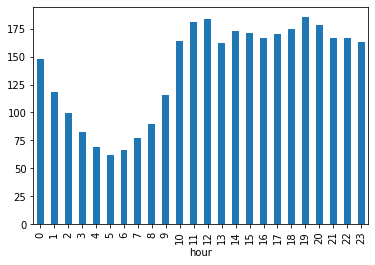

In [33]:
train.groupby('hour').Count.mean().plot.bar()

# Last 2 plots poves
- Traffic on weekdays will be more(groupby day)
- Traffic during the peak hours will be high(groupby hour)

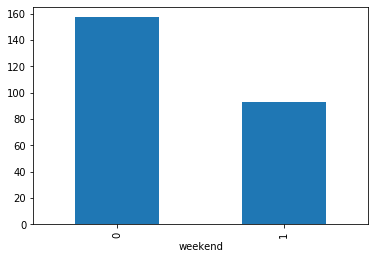

In [34]:
train.groupby('weekend').Count.mean().plot.bar()

Traffic on weekdays is more - once again proved but clear than before

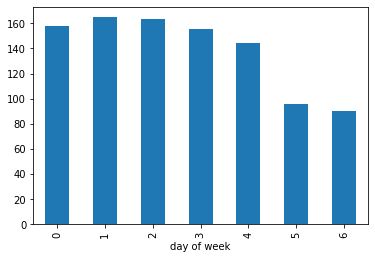

In [35]:
train.groupby('day of week')['Count'].mean().plot.bar()

From the above bar plot, we can infer that the passenger count is less for saturday and sunday as compared to the other days of the week. Now we will look at basic modeling techniques. Before that we will drop the ID variable as it has nothing to do with the passenger count.

As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series to daily, weekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn.

In [36]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 

In [37]:
train.dtypes

ID                      int64
Datetime       datetime64[ns]
Count                   int64
year                    int64
month                   int64
day                     int64
hour                    int64
day of week             int64
weekend                 int64
dtype: object

In [38]:
# datetime no more a column but a index or serial number
train.index = train.Timestamp

In [39]:
train.head()

,ID,Datetime,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [40]:
train=train.drop('ID',1)

In [41]:
hourly = train.resample('H').mean() 

In [42]:
hourly.head()

,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [43]:
daily = train.resample('D').mean() 

In [44]:
daily.head()

,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [45]:
monthly = train.resample('M').mean()

In [46]:
monthly

,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,
2012-08-31,2.952381,2012.0,8.0,28.0,11.5,3.000000,0.285714
2012-09-30,4.444444,2012.0,9.0,15.5,11.5,3.166667,0.333333
2012-10-31,10.986559,2012.0,10.0,16.0,11.5,2.806452,0.258065
2012-11-30,15.827778,2012.0,11.0,15.5,11.5,3.033333,0.266667
2012-12-31,15.680108,2012.0,12.0,16.0,11.5,3.064516,0.322581
2013-01-31,18.430108,2013.0,1.0,16.0,11.5,2.903226,0.258065
2013-02-28,22.190476,2013.0,2.0,14.5,11.5,3.000000,0.285714
2013-03-31,23.588710,2013.0,3.0,16.0,11.5,3.193548,0.322581
2013-04-30,34.405556,2013.0,4.0,15.5,11.5,2.833333,0.266667


# here we resampled data based on hour, year and month
# i.e firstly hour, for one hour of one date we have only one value and so there won't be no change
# for daily wise resampling there are 726 different days and we take mean of every column for a day and strore in daily
# for monthly 26 rows and mean is taken as before
# lly for weekly we will take below

In [47]:
weekly=train.resample('W').mean()
weekly.shape # 726 days were there and there by 110 is acceptable

(110, 7)

In [48]:
weekly.head()

,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,
2012-08-26,3.416667,2012.0,8.000000,25.500000,11.5,5.5,1.000000
2012-09-02,3.345238,2012.0,8.285714,21.142857,11.5,3.0,0.285714
2012-09-09,3.654762,2012.0,9.000000,6.000000,11.5,3.0,0.285714
2012-09-16,3.119048,2012.0,9.000000,13.000000,11.5,3.0,0.285714
2012-09-23,4.714286,2012.0,9.000000,20.000000,11.5,3.0,0.285714


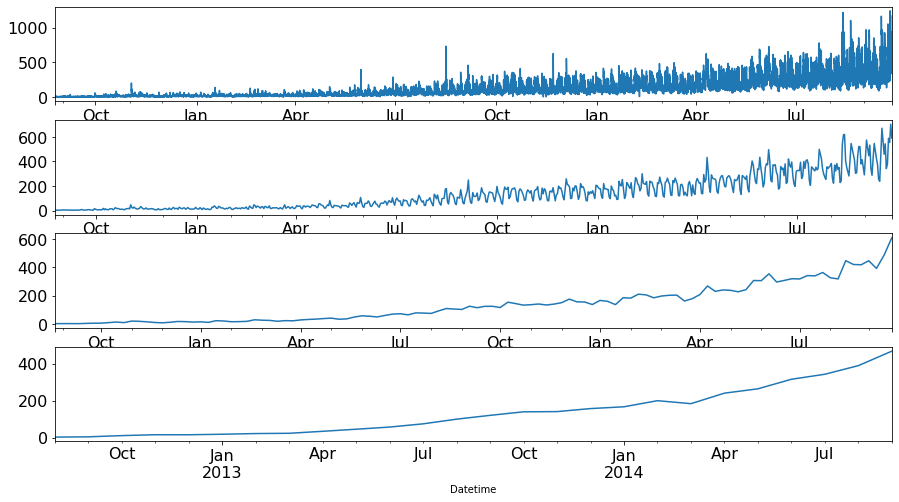

In [49]:
fig,axs=plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8),ax=axs[0],label='hourly',fontsize=16)
daily.Count.plot(figsize=(15,8),ax=axs[1],label='daily',fontsize=16)
weekly.Count.plot(figsize=(15,8),ax=axs[2],label='weekly',fontsize=16)
monthly.Count.plot(figsize=(15,8),ax=axs[3],label='monthly',fontsize=16)

In [50]:
train =daily # from the inference of previous cell

In [51]:
test=test.drop('ID',1)

In [52]:
test.columns

Index(['Datetime', 'year', 'month', 'day', 'hour'], dtype='object')

In [53]:
test.head()

,Datetime,year,month,day,hour
0,2014-09-26 00:00:00,2014,9,26,0
1,2014-09-26 01:00:00,2014,9,26,1
2,2014-09-26 02:00:00,2014,9,26,2
3,2014-09-26 03:00:00,2014,9,26,3
4,2014-09-26 04:00:00,2014,9,26,4


In [54]:
test.dtypes

Datetime    datetime64[ns]
year                 int64
month                int64
day                  int64
hour                 int64
dtype: object

In [55]:
test.index=test.Datetime

In [56]:
test=test.resample('D').mean()

In [57]:
test.head()

,year,month,day,hour
Datetime,,,,
2014-09-26,2014.0,9.0,26.0,11.5
2014-09-27,2014.0,9.0,27.0,11.5
2014-09-28,2014.0,9.0,28.0,11.5
2014-09-29,2014.0,9.0,29.0,11.5
2014-09-30,2014.0,9.0,30.0,11.5


# splitting data to train,validation and test

But before we do that, we will need a dataset(validation) to check the performance and generalisation ability of our model. Below are some of the properties of the dataset required for the purpose.

The dataset should have the true values of the dependent variable against which the predictions can be checked. Therefore, test dataset cannot be used for the purpose.

The model should not be trained on the validation dataset. Hence, we cannot train the model on the train dataset and validate on it as well.

In [58]:
train.head()

,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


## Train and Validation Data

In [59]:
Train=train.ix['2012-08-25':'2014-06-24'] 
valid=train.ix['2014-06-25':'2014-09-25'] # last 3 months as validation data
# as recent values will have present trend and is used for validation
# and we can't take more than 3 months because if we take more then train data becomes less

This type of splitting dataset is called time based splitting, if we split randomly then it might work well for train data but not for validation data

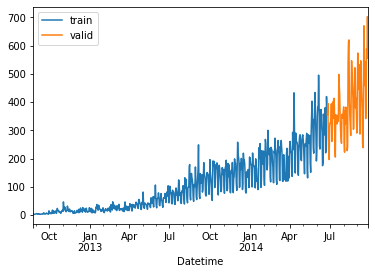

In [60]:
Train.Count.plot(label='train')
valid.Count.plot(label='valid')
plt.legend()

# Modeling Techniques

- 1) Naive Approach
- 2) Moving Average
- 3) Simple Exponential Smoothing
- 4) Holt's Linear Trend Model

Naive Approach - last point is the next expceted point.
So, we expect a straight horizontal line as prediction

In [61]:
import numpy as np

In [62]:
valid_pred_naive=np.full((valid.shape[0]),Train.Count[Train.shape[0]-1])

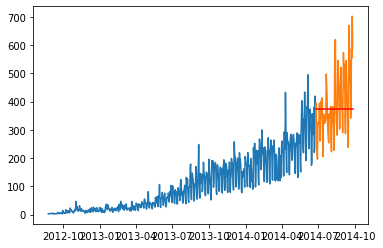

In [63]:
plt.plot(Train.index,Train['Count'])
plt.plot(valid.index,valid['Count'])
plt.plot(valid.index,valid_pred_naive,color='r')

## We can calculate how accurate our predictions are using rmse(Root Mean Square Error)

In [64]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [65]:
rmse=sqrt(mse(np.asarray(valid.Count),valid_pred_naive))

In [66]:
rmse

111.79050467496724

# by seeing the rmse we can clearly state that this model/intution is not correct =>  validation is done and Naive approach is rejected

# Moving Average
## In previous method, we didn't follow the trend for validation data, to follow that we go for Average value. 
# But when we have high variability data then we must go for moving average.
## In moving average
# we will take the average of the passenger counts for last few time periods only

let us take rolling mean for last 10,20,50 days

Here the predictions are made on the basis of the average of last few points instead of taking all the previously known values.

In [67]:
ma=valid.copy()
ma['ma']=Train['Count'].rolling(10).mean().iloc[-1]

In [68]:
Train.head()

,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [69]:
rms=sqrt(mse(valid.Count,ma.ma ))

In [70]:
rms

134.23733308950264

134.23733308950264
130.44984977550422
129.6495809983456
135.87670727116196
144.19175679986802


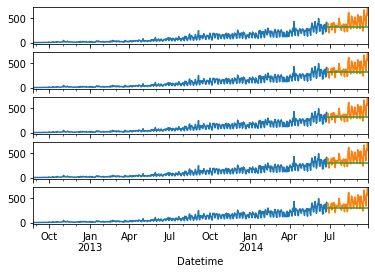

In [71]:
fig,axs=plt.subplots(5,1)
for x,y in zip([10,20,30,40,50],axs):
    ma['ma']=Train['Count'].rolling(x).mean().iloc[-1]
    print(sqrt(mse(valid.Count,ma.ma )))
    Train.Count.plot(ax=y)
    valid.Count.plot(ax=y)
    ma.ma.plot(ax=y)

# so we choose 30 as optimum ma window

In [72]:
ma.iloc[60:80,:1]

,Count
Datetime,
2014-08-24,306.666667
2014-08-25,448.500000
2014-08-26,521.250000
2014-08-27,520.666667
2014-08-28,379.250000
2014-08-29,413.750000
2014-08-30,352.583333
2014-08-31,290.166667
2014-09-01,436.000000


# Simple Exponential Smoothing

In this technique, we assign larger weights to more recent observations than to observations from the distant past.
The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.

 If we give the entire weight to the last observed value only, this method will be similar to the naive approach. So, we can say that naive approach is also a simple exponential smoothing technique where the entire weight is given to the last observed value.

In [73]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [74]:
val_temp=valid.copy()

In [75]:
fit2=SimpleExpSmoothing(np.asarray(Train.Count)).fit(smoothing_level=0.6,optimized=False)

In [76]:
val_temp['val']=fit2.forecast(len(val_temp))

In [77]:
val_temp.head(10)

,Count,year,month,day,hour,day of week,weekend,val
Datetime,,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0,363.522492
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0,363.522492
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0,363.522492
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0,363.522492
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0,363.522492
2014-06-30,314.500000,2014.0,6.0,30.0,11.5,0.0,0.0,363.522492
2014-07-01,326.500000,2014.0,7.0,1.0,11.5,1.0,0.0,363.522492
2014-07-02,326.083333,2014.0,7.0,2.0,11.5,2.0,0.0,363.522492
2014-07-03,323.916667,2014.0,7.0,3.0,11.5,3.0,0.0,363.522492


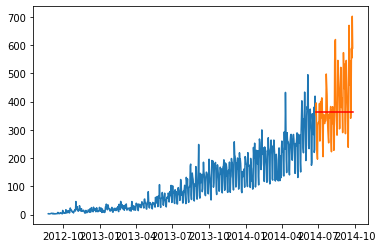

In [78]:
plt.plot(Train.index,Train.Count)
plt.plot(valid.index,valid.Count)
plt.plot(valid.index,val_temp.val,color='r')

In [79]:
rsme=sqrt(mse(valid.Count,val_temp.val))

In [80]:
rsme

113.43708111884514

# Holt's Linear Trend Model

It is an extension of simple exponential smoothing to allow forecasting of data with a <b>trend</b>.
This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.

 We can decompose the time series in four parts.

- Observed, which is the original time series.
- Trend, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.
- Seasonal, which tells us about the seasonality in the time series.
- Residual, which is obtained by removing any trend or seasonality in the time series.

In [81]:
import statsmodels.api as sm

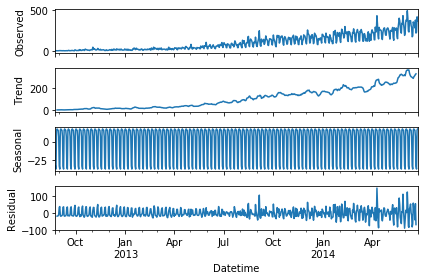

In [82]:
sm.tsa.seasonal_decompose(Train.Count).plot()
result=sm.tsa.stattools.adfuller(train.Count)
plt.show()

In [83]:
result

(2.9863509590138357,
 1.0,
 20,
 741,
 {'1%': -3.4392057325732104,
  '5%': -2.8654483492874236,
  '10%': -2.5688512291811225},
 7212.068059584323)

In [84]:
from statsmodels.tsa.api import Holt

In [85]:
fit1=Holt(np.asarray(Train.Count)).fit(smoothing_level=0.3,smoothing_slope=0.1)

In [86]:
holt_res=valid.copy()
holt_res['Holt']=fit1.forecast(len(valid))

In [87]:
holt_res.head()

,Count,year,month,day,hour,day of week,weekend,Holt
Datetime,,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0,334.650767
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0,337.159011
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0,339.667256
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0,342.175500
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0,344.683745


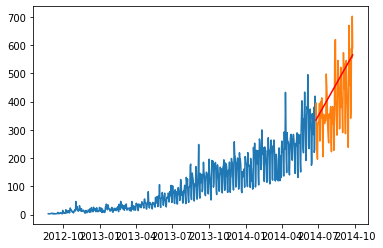

In [88]:
plt.plot(Train.index,Train['Count'])
plt.plot(valid.index,valid['Count'])
plt.plot(valid.index,holt_res['Holt'],color='r')

# Thus trend is maintained but linearly by this type of forecasting

In [89]:
rmse=sqrt(mse(valid.Count,holt_res.Holt))

In [90]:
rmse

112.94278345314041

#  Holt’s Linear Trend Model on daily time series

# so i'm now going to input test data to model

In [91]:
from statsmodels.tsa.api import Holt
fit1=Holt(np.asarray(Train.Count)).fit(smoothing_level=0.3,smoothing_slope=0.1)
# submission=pd.read_csv("submission.csv")
predict=fit1.forecast(len(test))
test['prediction']=predict

keep it a side, just know the concept, later we will get back to it

# Holt winter’s model on daily time series
- Datasets which show a similar set of pattern after fixed intervals of a time period suffer from seasonality.

- The above mentioned models don’t take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast future prices.

- One such algorithm that we can use in such a scenario is Holt’s Winter method. The idea behind Holt’s Winter is to apply exponential smoothing to the seasonal components in addition to level and trend.

# i.e. we have taken care of trend till now, now we will be taking care of seasonality by applying exponential smoothing in seasonal componenets
# Here both <i>trend</i> and <i>seasonality</i> are taken care

In [92]:
hw=valid.copy()
fit1=ExponentialSmoothing(np.asarray(Train.Count),seasonal_periods=7,trend='add',seasonal='add',).fit()


In [93]:
hw['hw']=fit1.forecast(len(valid))

<Figure size 1440x720 with 0 Axes>

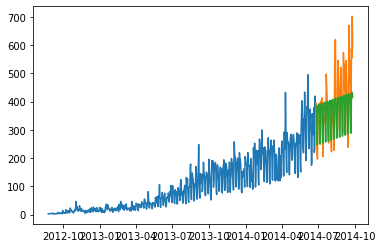

<Figure size 1440x720 with 0 Axes>

In [94]:
plt.plot(Train.index,Train.Count)
plt.plot(valid.index,valid.Count)
plt.plot(valid.index,hw.hw)
plt.figure(figsize=(20,10))

In [95]:
rmse=sqrt(mse(valid.Count,hw.hw))

In [96]:
rmse

82.37571191747172

In [97]:
predict=fit1.forecast(len(test))

In [98]:
predict

array([387.35999484, 369.13592075, 355.56330161, 247.08875373,
       246.19264428, 385.87902965, 376.80169546, 390.85401079,
       372.6299367 , 359.05731755, 250.58276967, 249.68666023,
       389.37304559, 380.2957114 , 394.34802673, 376.12395264,
       362.55133349, 254.07678562, 253.18067617, 392.86706154,
       383.78972735, 397.84204268, 379.61796859, 366.04534944,
       257.57080156, 256.67469212, 396.36107748, 387.28374329,
       401.33605862, 383.11198453, 369.53936538, 261.0648175 ,
       260.16870806, 399.85509343, 390.77775923, 404.83007456,
       386.60600047, 373.03338132, 264.55883345, 263.662724  ,
       403.34910937, 394.27177518, 408.32409051, 390.10001642,
       376.52739727, 268.05284939, 267.15673995, 406.84312531,
       397.76579112, 411.81810645, 393.59403236, 380.02141321,
       271.54686534, 270.65075589, 410.33714126, 401.25980707,
       415.31212239, 397.0880483 , 383.51542916, 275.04088128,
       274.14477183, 413.8311572 , 404.75382301, 418.80

In [99]:
test['prediction']=predict

# Now left over thing is residue as trend and seasonlity is covered by Holt's winter model and these three are achieved by ARIMA

- ARIMA stands for Auto Regression Integrated Moving Average. It is specified by three ordered parameters (p,d,q).

- Here p is the order of the autoregressive model(number of time lags)
- d is the degree of differencing(number of times the data have had past values subtracted)
- q is the order of moving average model. We will discuss more about these parameters in next section.

Arima is a stationary time series

There are three basic criterion for a series to be classified as stationary series :

- The mean of the time series should not be a function of time. It should be constant.
- The variance of the time series should not be a function of time.
- The covariance of the ith term and the (i+m)th term should not be a function of time.

Why do we have to make the time series stationary?
We make the series stationary to make the variables independent. Variables can be dependent in various ways, but can only be independent in one way. So, we will get more information when they are independent. Hence the time series must be stationary.

If the time series is not stationary, firstly we have to make it stationary. For doing so, we need to remove the trend and seasonality from the data. To learn more about stationarity you can refer this article: https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

ARIMA, SARIMAX are left out things
Do it when you are free in these exam days

- https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/
- https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
- https://www.analyticsvidhya.com/blog/2015/09/questions-ensemble-modeling/
- https://www.analyticsvidhya.com/blog/2015/08/introduction-ensemble-learning/
- These things must be covered more in time series

# ARIMA

ARIMA stands for Auto Regression Integrated Moving Average. It is specified by three ordered parameters (p,d,q).

Here p is the order of the autoregressive model(number of time lags)
d is the degree of differencing(number of times the data have had past values subtracted)
q is the order of moving average model. We will discuss more about these parameters in next section.

# What is a stationary time series?
## There are three basic criterion for a series to be classified as stationary series :

- The mean of the time series should not be a function of time. It should be constant.
- The variance of the time series should not be a function of time.
- THe covariance of the ith term and the (i+m)th term should not be a function of time.

# Why do we have to make the time series stationary? 
We make the series stationary to make the variables independent. Variables can be dependent in various ways, but can only be independent in one way. So, we will get more information when they are independent. Hence the time series must be stationary.

If the time series is not stationary, firstly we have to make it stationary. For doing so, we need to remove the trend and seasonality from the data. To learn more about stationarity you can refer this article: https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

First of all we have to make sure that the time series is stationary. If the series is not stationary, we will make it stationary.

# Stationarity Check
- We use Dickey Fuller test to check the stationarity of the series.
- The intuition behind this test is that it determines how strongly a time series is defined by a trend.
- The null hypothesis of the test is that time series is not stationary (has some time-dependent structure).
- The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

# The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

## our null hypothesis is being not stationary

# Dickey-Fuller Test

In [100]:
from statsmodels.tsa.stattools import adfuller

In [101]:
def test_stationary(timeseries):
    rollmean=timeseries.rolling(24).mean()
    rollstd=timeseries.rolling(24).std()
    plt.plot(timeseries,color='blue',label='original')
    plt.plot(rollmean,color='red',label='r mean')
    plt.plot(rollstd,color='green',label='r std')
    plt.legend()
    dftest=adfuller(timeseries,autolag="AIC")
    dfop=pd.Series(dftest[:-2],index=["Test statistic","p-value","no of lags used","no of obs"])
    for key,value in dftest[-2].items():
        dfop["crictical value of %s"%key]=value
    return dfop

0    8
1    2
2    6
3    2
4    2
Name: Count, dtype: int64

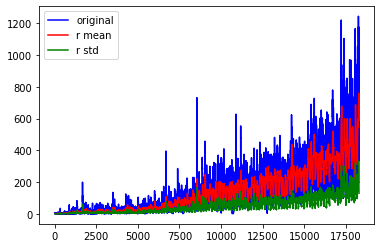

In [102]:
test_stationary(train_original['Count'])
train_original.Count.head()

 test statistic < critical values => reject null hypothesis => data is stationary <br/>
 we will try to make the data more stationary. For doing so, we need to remove the trend and seasonality from the data.

# https://datahack.analyticsvidhya.com/contest/practice-problem-time-series-2/ - problem to be solved to understand things better

# The statistics shows that the time series is stationary as Test Statistic < Critical value but we can see an increasing trend in the data. So, firstly we will try to make the data more stationary. For doing so, we need to remove the trend and seasonality from the data.

# Removing Trend
- A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear.

- We see an increasing trend in the data so we can apply transformation which penalizes higher values more than smaller ones, for example log transformation.

- We will take rolling average here to remove the trend. We will take the window size of 24 based on the fact that each day has 24 hours.

In [103]:
type(train_original.Count.rolling(24).mean())

pandas.core.series.Series

In [104]:
# to minimize the higher amplitude members we will perform log
train_log=np.log(Train['Count'].values)
valid_log=np.log(valid.Count.values)


In [105]:
moving_avg=pd.Series(train_log).rolling(24).mean()

In [106]:

moving_avg.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64

In [107]:
ma_diff=train_log-moving_avg.values
ma_diff.shape

(669,)

In [108]:
ma_diff=pd.DataFrame(ma_diff)
ma_diff.dropna(inplace=True)

In [109]:
ma_diff.head()

,0
23,0.144489
24,0.821405
25,0.623172
26,-0.021259
27,0.029426


In [110]:
ma_diff=ma_diff.values.flatten()

Test statistic           -5.861646e+00
p-value                   3.399422e-07
no of lags used           2.000000e+01
no of obs                 6.250000e+02
crictical value of 1%    -3.440856e+00
crictical value of 5%    -2.866175e+00
crictical value of 10%   -2.569239e+00
dtype: float64

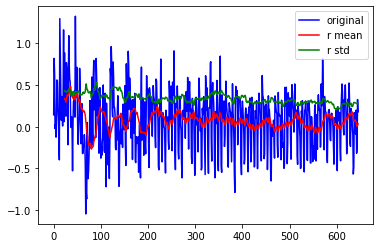

In [111]:
test_stationary(pd.Series(ma_diff))

# here trend is removed but mean is not stable so

# We can see that the Test Statistic is very smaller as compared to the Critical Value. So, we can be confident that the trend is almost removed.

# Let’s now stabilize the mean of the time series which is also a requirement for a stationary time series.

# Differencing can help to make the series stable and eliminate the trend.

In [112]:
train_log=pd.Series(train_log)
train_log_diff=train_log-train_log.shift(1)

In [113]:
train_log_diff.head()

0         NaN
1    0.146603
2   -0.350202
3   -0.066691
4    0.033902
dtype: float64

Test statistic           -8.237568e+00
p-value                   5.834049e-13
no of lags used           1.900000e+01
no of obs                 6.480000e+02
crictical value of 1%    -3.440482e+00
crictical value of 5%    -2.866011e+00
crictical value of 10%   -2.569151e+00
dtype: float64

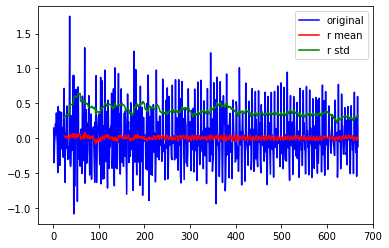

In [114]:
train_log_diff.dropna(inplace=True)
test_stationary(train_log_diff)

# now we can see trend is removed but what about seasonality and residue? let's take a look

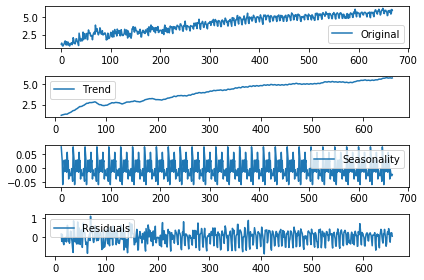

<Figure size 1440x720 with 0 Axes>

In [115]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(train_log, freq = 24) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411) 
plt.plot(train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout()
plt.figure(figsize=(20,10))
plt.show()

Test statistic           -7.822096e+00
p-value                   6.628321e-12
no of lags used           2.000000e+01
no of obs                 6.240000e+02
crictical value of 1%    -3.440873e+00
crictical value of 5%    -2.866183e+00
crictical value of 10%   -2.569243e+00
dtype: float64

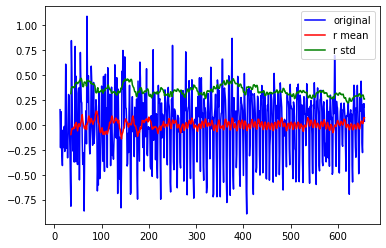

In [116]:
residual.dropna(inplace=True)
test_stationary(residual)

# now that we got test statistic as -7.82
# I can say -  It can be interpreted from the results that the residuals are stationary.

# Now we will forecast the time series using different models.

So till here we have converted data into <b><h1>Stationary</h1></b>

# Forecasting the time series using ARIMA
-  First of all we will fit the ARIMA model on our time series for that we have to find the optimized values for the p,d,q parameters.
-  To find the optimized values of these parameters, we will use ACF(Autocorrelation Function) and PACF(Partial Autocorrelation Function) graph.
- ACF is a measure of the correlation between the TimeSeries with a lagged version of itself.
- PACF measures the correlation between the TimeSeries with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.

In [117]:
from statsmodels.tsa.stattools import acf, pacf 
lag_acf = acf(train_log_diff.dropna(), nlags=25) 
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

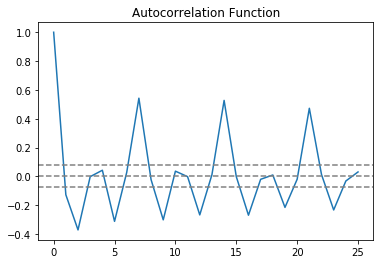

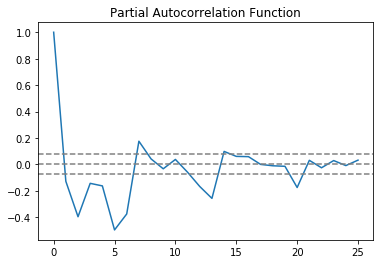

In [119]:
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

# p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case p=1.
# q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case q=1.

# Now we will make the ARIMA model as we have the p,q values. We will make the AR and MA model separately and then combine them together.

# The autoregressive model specifies that the output variable depends linearly on its own previous values.

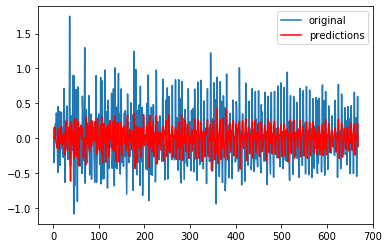

In [121]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model 
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_AR.fittedvalues, color='red', label='predictions') 
plt.legend(loc='best') 
plt.show()

# in the same way with the help of ARIMA function, we can vary p,d,q values and find aic value or as we did before from acf and pacf get p and q and then forecast
# SARIMA is seasonal ARIMA where seasonality is also taken care.